In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn import model_selection

## __1 - Business Problem__  
___Prepare a classification model using Naive Bayes for salary data___  

## __2 - Data collection and description__ 

In [2]:
test_tmp = pd.read_csv("../Raw Data//SalaryData_Test.csv")
train_tmp = pd.read_csv("../Raw Data//SalaryData_Train.csv")

In [4]:
df_tmp = test_tmp.add(train_tmp)

In [5]:
test = test_tmp.copy()
train = train_tmp.copy()

In [6]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [7]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
str_c = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [9]:
number = LabelEncoder()

In [10]:
for i in str_c:
    train[i]= number.fit_transform(train[i])
    test[i]=number.fit_transform(test[i])

In [11]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [12]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [13]:
mapping = {' >50K': 1, ' <=50K': 2}

In [14]:
train = train.replace({'Salary': mapping})
test = test.replace({'Salary': mapping})

In [16]:
df = train.add(test) 

In [20]:
df1 = df.copy()

In [21]:
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,64.0,7.0,10.0,20.0,8.0,6.0,4.0,6.0,2.0,2174.0,0.0,80.0,74.0,4.0
1,88.0,6.0,20.0,22.0,4.0,7.0,0.0,8.0,2.0,0.0,0.0,63.0,74.0,4.0
2,66.0,3.0,18.0,21.0,2.0,15.0,1.0,8.0,2.0,0.0,0.0,80.0,74.0,3.0
3,97.0,4.0,16.0,17.0,4.0,11.0,0.0,4.0,2.0,7688.0,0.0,80.0,74.0,3.0
4,62.0,4.0,9.0,19.0,6.0,16.0,6.0,6.0,1.0,0.0,0.0,70.0,41.0,4.0


In [23]:
df1.shape

(30161, 14)

In [24]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,15060.0,77.195750,18.851834,34.0,63.0,76.0,90.0,155.0
workclass,15060.0,4.418858,1.361920,0.0,4.0,4.0,5.0,10.0
education,15060.0,20.640571,5.352129,0.0,18.0,22.0,24.0,30.0
educationno,15060.0,20.242829,3.606840,2.0,18.0,20.0,23.0,32.0
maritalstatus,15060.0,5.173440,2.105886,0.0,4.0,6.0,6.0,12.0
occupation,15060.0,11.944887,5.705434,0.0,8.0,12.0,16.0,26.0
relationship,15060.0,2.825166,2.255990,0.0,1.0,3.0,4.0,10.0
race,15060.0,7.367198,1.170373,0.0,7.0,8.0,8.0,8.0
sex,15060.0,1.350066,0.665049,0.0,1.0,1.0,2.0,2.0
capitalgain,15060.0,2197.144887,10668.177924,0.0,0.0,0.0,0.0,199998.0


In [25]:
df1.isnull().sum()

age              15101
workclass        15101
education        15101
educationno      15101
maritalstatus    15101
occupation       15101
relationship     15101
race             15101
sex              15101
capitalgain      15101
capitalloss      15101
hoursperweek     15101
native           15101
Salary           15101
dtype: int64

### Finding Correlation

In [26]:
corr = df1.corr()

<Axes: >

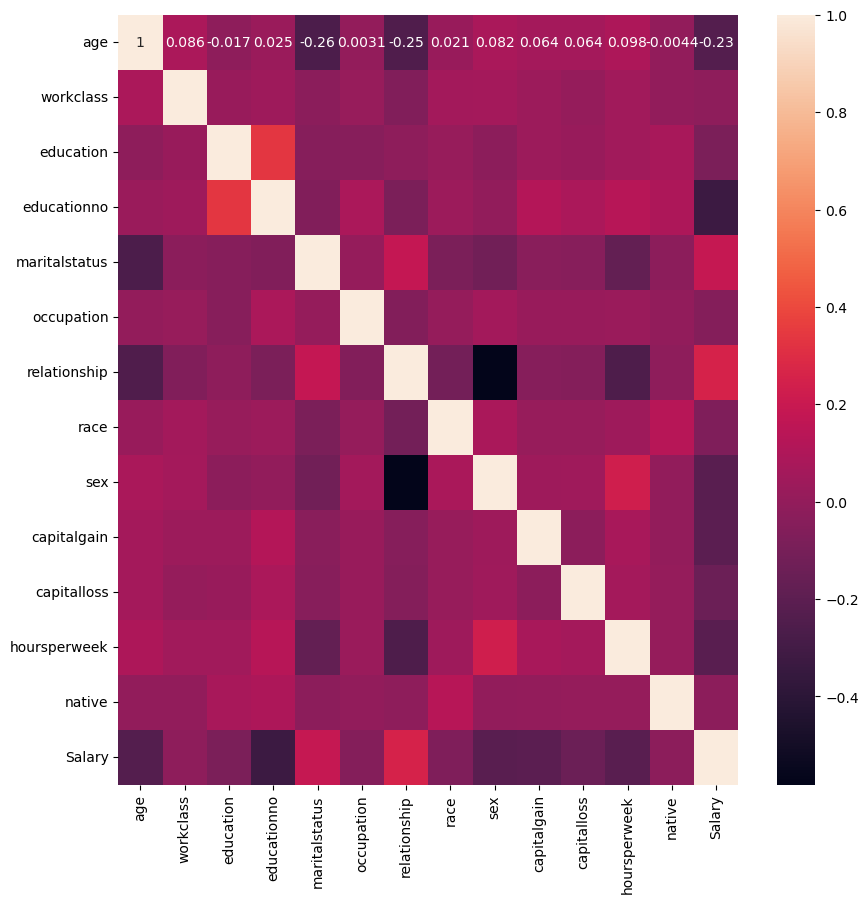

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [28]:
plt.rcParams["figure.figsize"] = 9,5

Skew: -0.21499746800554054
Kurtosis: 0.302197257705175


/var/folders/qf/59s2hyj17wx1jdx8qbwchk8w0000gn/T/ipykernel_63683/3245447950.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df1['educationno'],shade=True,color='g')
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


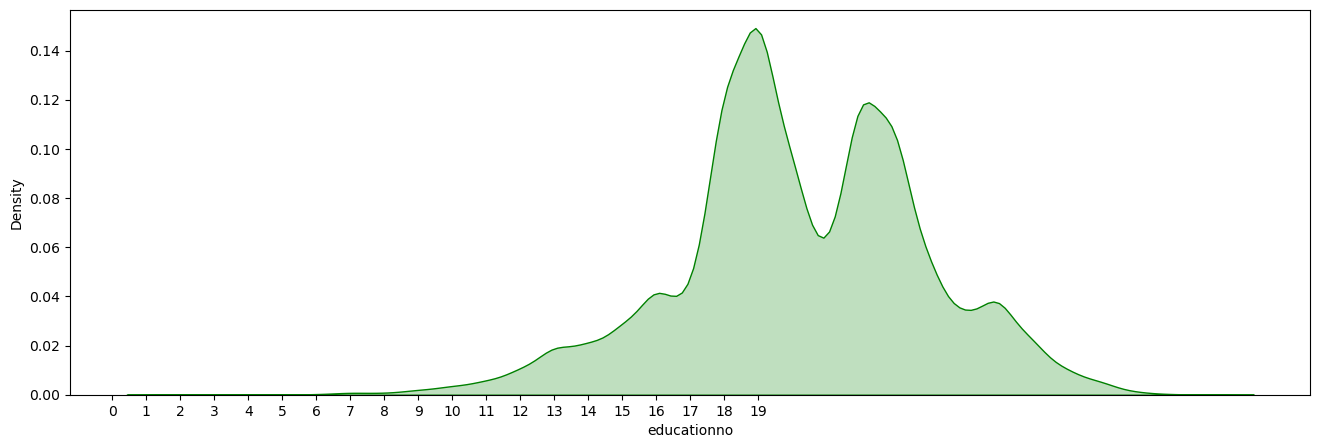

In [29]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['educationno'].skew()))
print("Kurtosis: {}".format(df1['educationno'].kurtosis()))
ax = sns.kdeplot(df1['educationno'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

### The Data is negatively skewed and has low kurtosis value  
### Most of people have eduction Number of years of education 8 - 11

In [30]:
dfa = df_tmp[df_tmp.columns[0:13]]
obj_colum = dfa.select_dtypes(include='object').columns.tolist()

ValueError: num must be an integer with 1 <= num <= 4, not 5

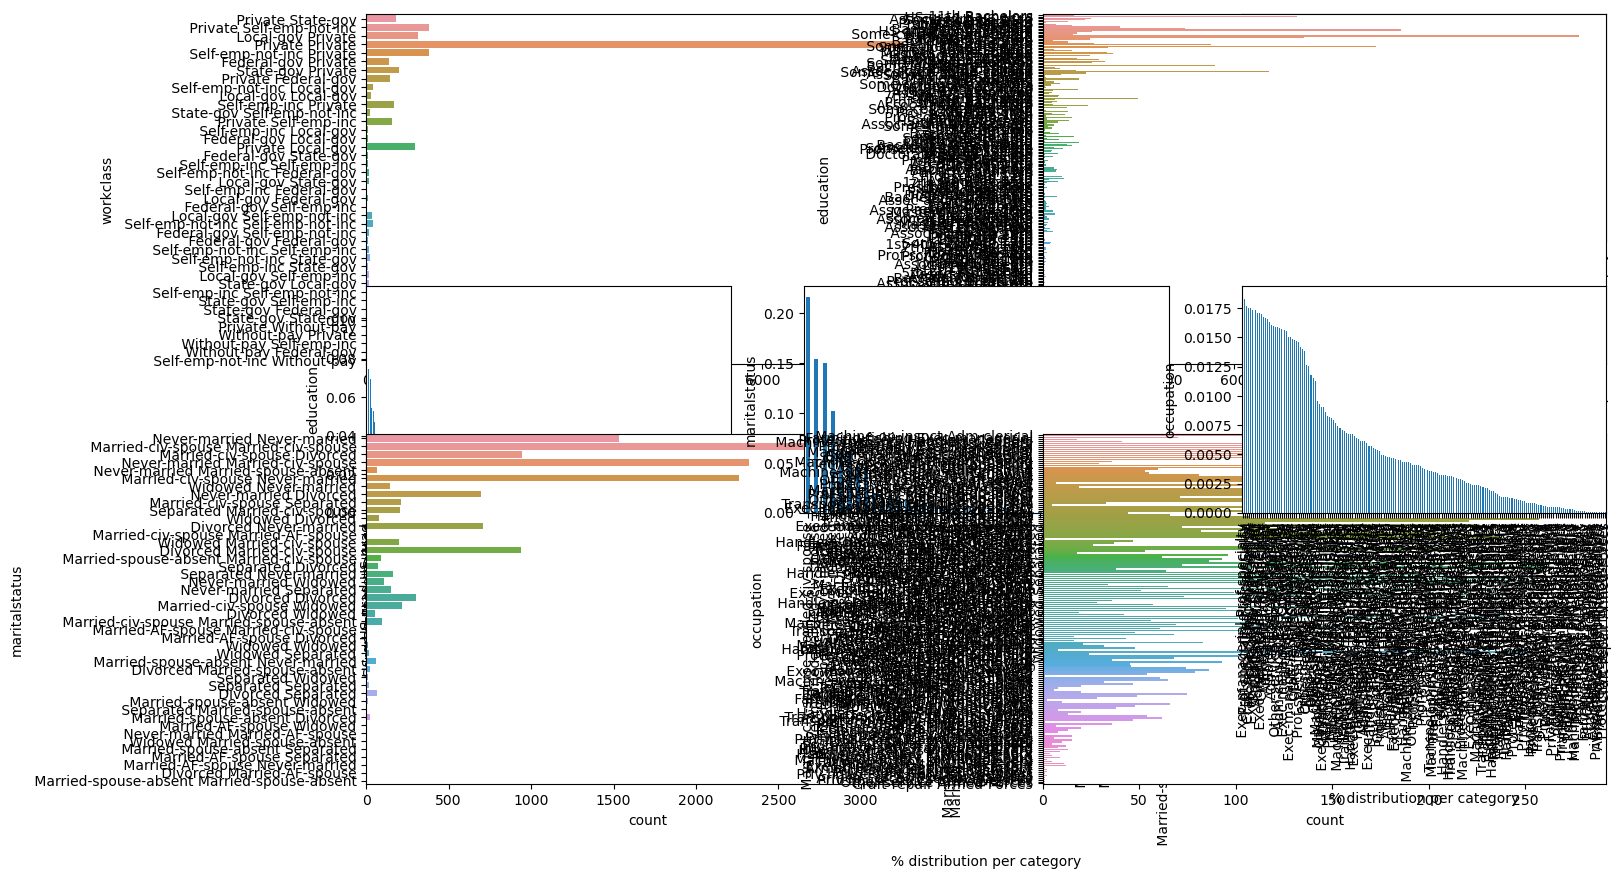

In [34]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(3,3,i+2)
    df_tmp[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

### Majority of the workclass is in Private Sector  
### Also for education mojority of the people have HS graduation or some college degree

In [35]:
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

/var/folders/qf/59s2hyj17wx1jdx8qbwchk8w0000gn/T/ipykernel_63683/2239169671.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],color='g',shade=True)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/qf/59s2hyj17wx1jdx8qbwchk8w0000gn/T/ipykernel_63683/2239169671.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],color='g',shade=True)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

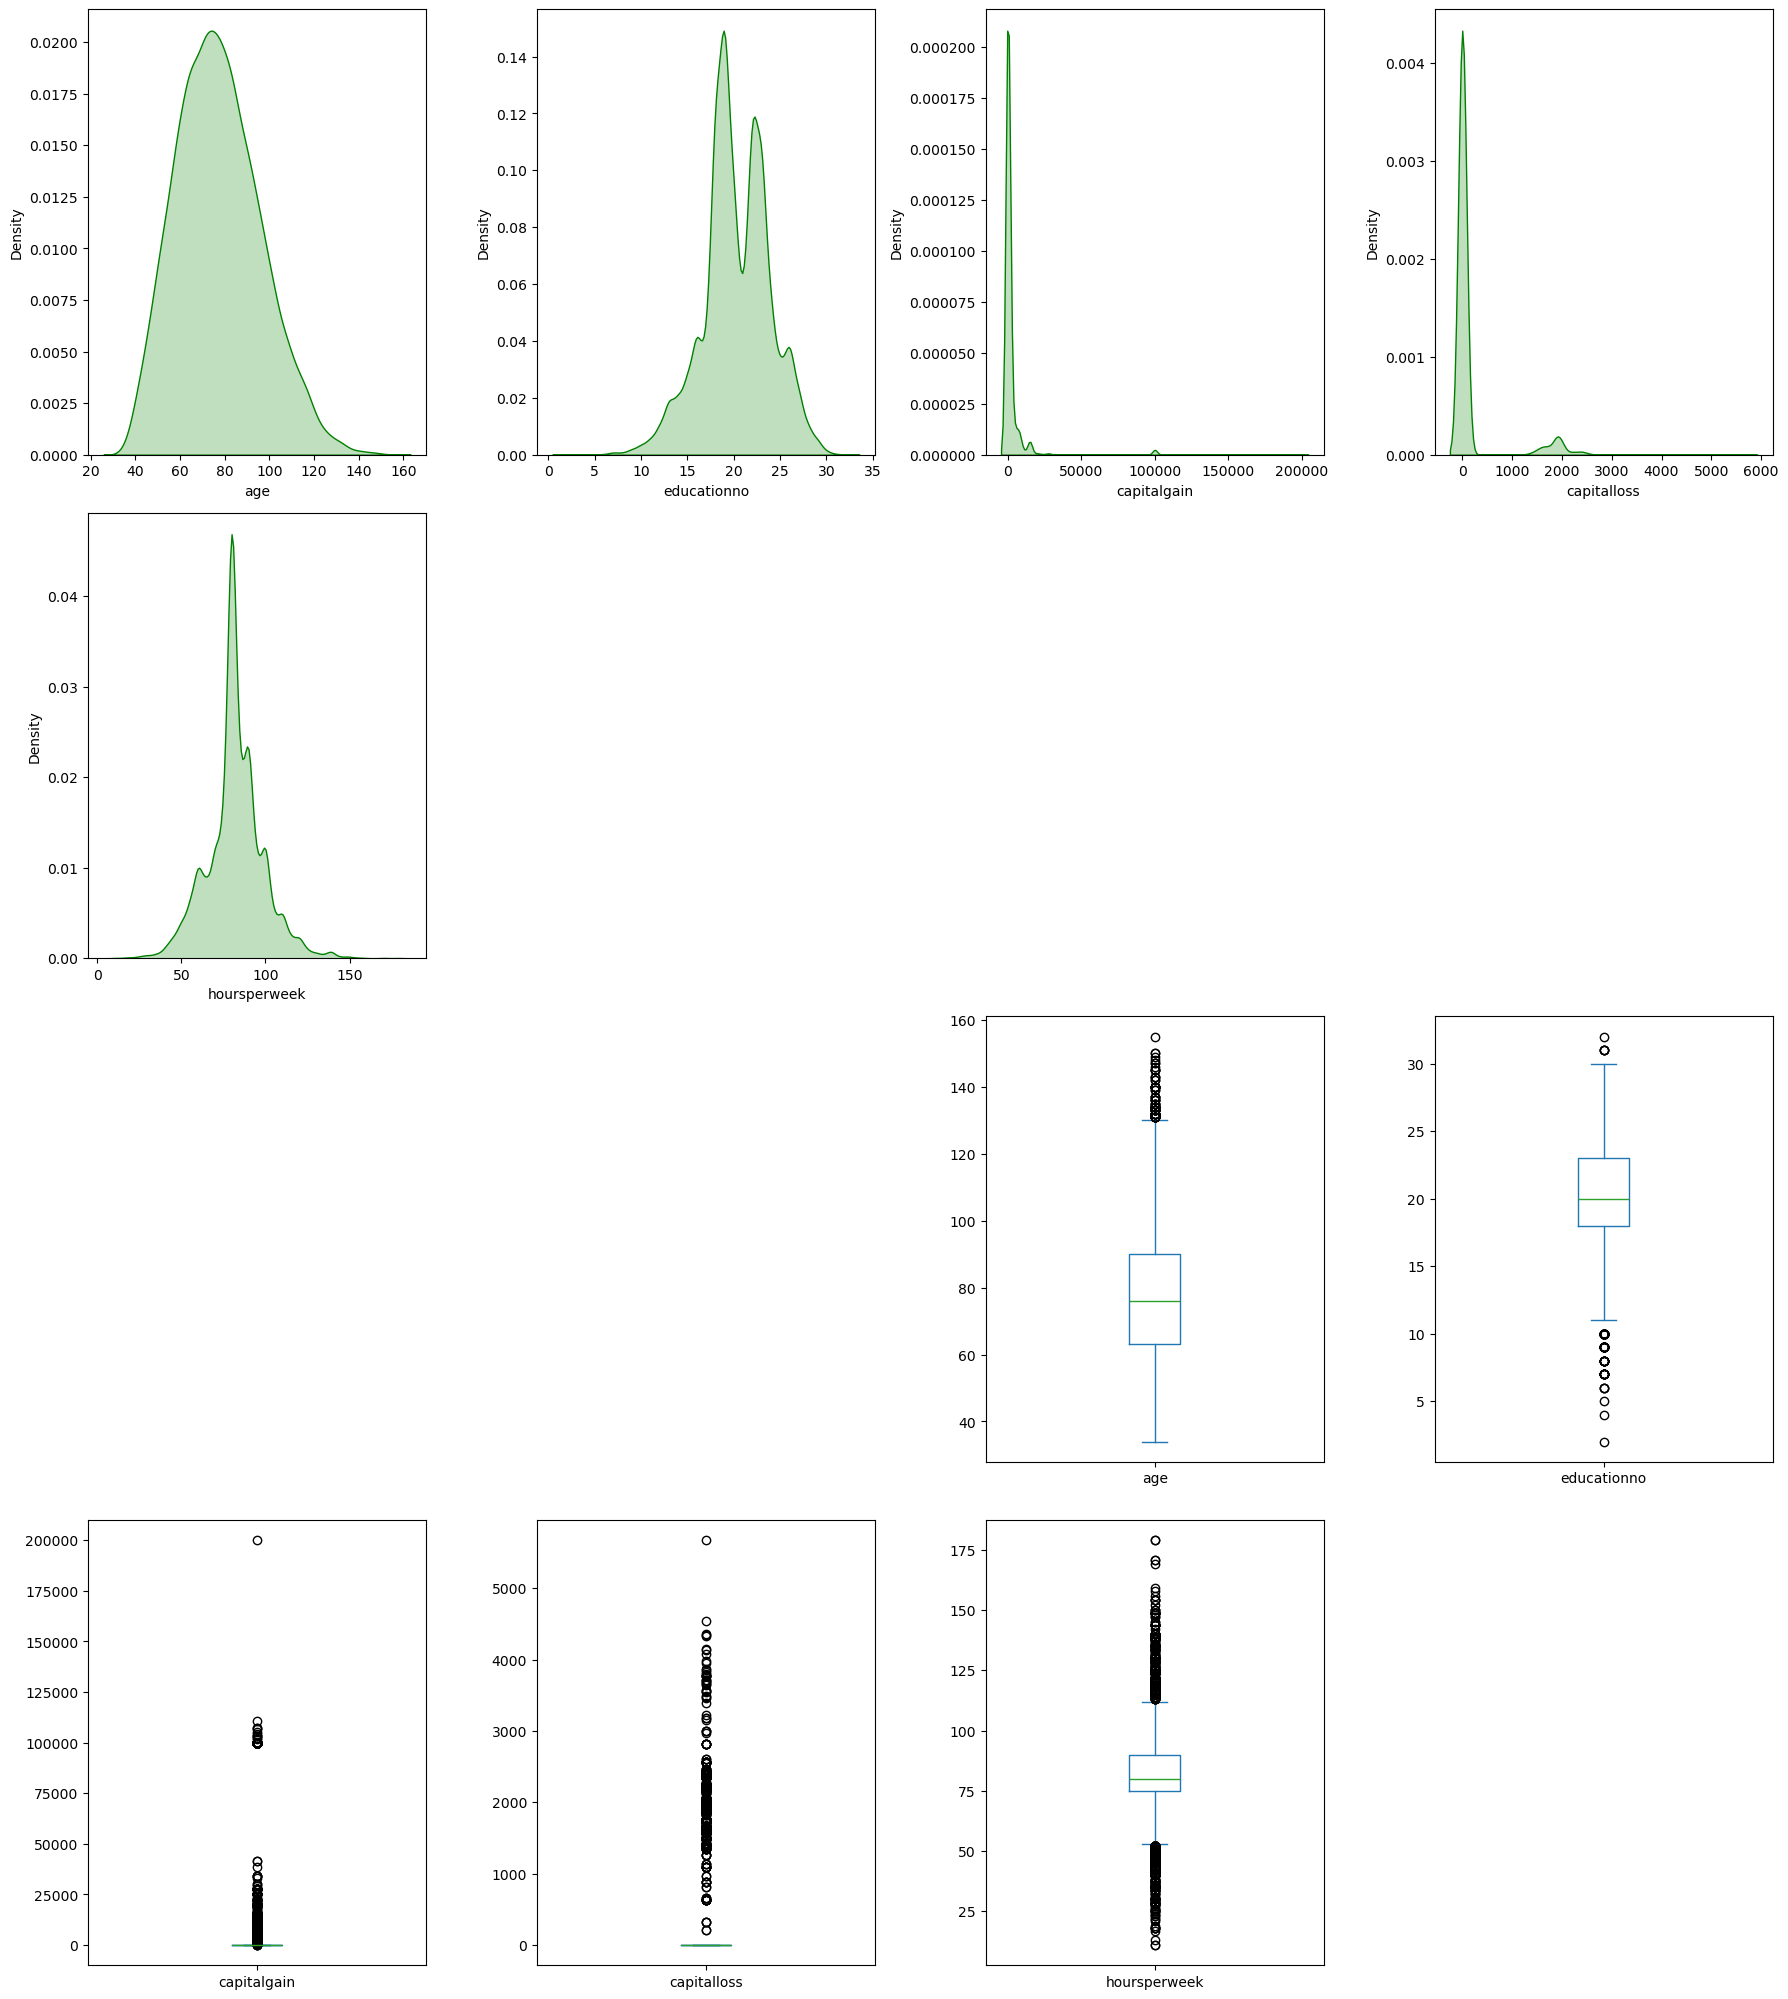

,age,educationno,capitalgain,capitalloss,hoursperweek
skewness,0.388441,-0.214997,8.419641,3.180827,0.230470
kurtosis,-0.092704,0.302197,77.619545,9.659017,1.602872


In [36]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

## __3 - Naive Bayes__ 

In [37]:
x_train = train.iloc[:,0:13]
y_train = train.iloc[:,13]
x_test = test.iloc[:,0:13]
y_test = test.iloc[:,13]

#### __3.1 - GaussianNB__ 

In [38]:
clsfrgnb = GaussianNB()

In [39]:
clsfrgnb.fit(x_train, y_train)

GaussianNB()

In [40]:
y_pred_gnb = clsfrgnb.predict(x_test)

In [41]:
confusion_matrix(y_test, y_pred_gnb)

array([[ 1209,  2491],
       [  601, 10759]])

In [42]:
pd.crosstab(y_test.values.flatten(),clsfrgnb)

col_0,GaussianNB()
row_0,
1,3700
2,11360


In [43]:
print ("Accuracy",np.mean(y_pred_gnb==y_test.values.flatten()))

Accuracy 0.7946879150066402


#### __3.2 - MultinomialNB__ 

In [44]:
clsfrmnb = MultinomialNB()

In [45]:
clsfrmnb.fit(x_train, y_train)

MultinomialNB()

In [46]:
y_pred_mnb = clsfrmnb.predict(x_test)

In [47]:
confusion_matrix(y_test, y_pred_mnb)

array([[  780,  2920],
       [  469, 10891]])

In [48]:
pd.crosstab(y_test.values.flatten(),clsfrmnb)

col_0,MultinomialNB()
row_0,
1,3700
2,11360


In [49]:
print ("Accuracy",np.mean(y_pred_mnb==y_test.values.flatten()))

Accuracy 0.7749667994687915


## __4 - Conclusion & Cross Validation__ 

### GaussianNB Model has a better Accuracy, Thus we will use GaussianNB Classifier  
### We will also cross validate the model with other classifiers to get better understanding of which classifier is best suited for our data

In [50]:
seed = 7

In [51]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [52]:
results = []
names = []
scoring = 'accuracy'

In [54]:
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=None)
	cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

LR: 0.801565 (0.006561)
LDA: 0.810650 (0.008475)
KNN: 0.833361 (0.005732)
CART: 0.807765 (0.004444)
NB: 0.795498 (0.006570)


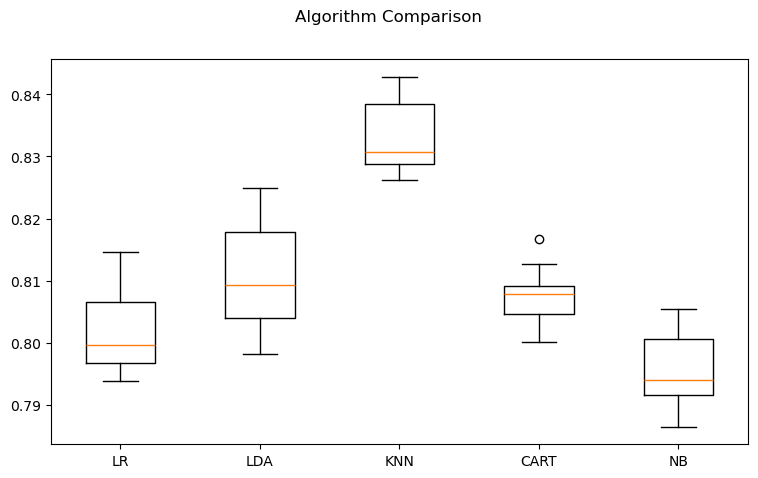

In [55]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### In comparision KNN has the best Accuracy